In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np

In [0]:
import pandas as pd
dataset = pd.read_csv("/content/drive/My Drive/Datasets: Cyber/Uncensored/UDP.csv")
dataset.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,UTC Time,Time,Relative Time,Absolute Time,Delta Time,Source,Destination,Protocol,Length,Info,SourcePort,DestPort,Cumulative Bytes,Hwdestaddr,Hwsrcaddr,Unresolved Destport,Unresolved Srcport,NetSrcAddr,NetDestAddr,ExpertInfo,Class
0,18-03-2017 13:11,13:11:23,0.000000,0.000000,18:41:23,0.000000,192.168.100.13,192.168.60.6,UDP,42,55951 > 53 Len=0,55951.0,53.0,42,fa:16:3e:66:6e:87,fa:16:3e:f2:5a:f7,53.0,55951.0,192.168.100.13,192.168.60.6,NaN,UDPFlood
1,18-03-2017 13:11,13:11:23,0.000027,0.000027,18:41:23,0.000027,192.168.100.9,192.168.60.6,UDP,42,37240 > 53 Len=0,37240.0,53.0,84,fa:16:3e:66:6e:87,fa:16:3e:f2:5a:f7,53.0,37240.0,192.168.100.9,192.168.60.6,NaN,UDPFlood
2,18-03-2017 13:11,13:11:23,0.000052,0.000052,18:41:23,0.000025,192.168.100.13,192.168.60.6,UDP,42,55952 > 53 Len=0,55952.0,53.0,126,fa:16:3e:66:6e:87,fa:16:3e:f2:5a:f7,53.0,55952.0,192.168.100.13,192.168.60.6,NaN,UDPFlood
3,18-03-2017 13:11,13:11:23,0.000078,0.000078,18:41:23,0.000026,192.168.100.15,192.168.60.6,UDP,42,63011 > 53 Len=0,63011.0,53.0,168,fa:16:3e:66:6e:87,fa:16:3e:f2:5a:f7,53.0,63011.0,192.168.100.15,192.168.60.6,NaN,UDPFlood
4,18-03-2017 13:11,13:11:23,0.000104,0.000104,18:41:23,0.000026,192.168.100.15,192.168.60.6,UDP,42,63012 > 53 Len=0,63012.0,53.0,210,fa:16:3e:66:6e:87,fa:16:3e:f2:5a:f7,53.0,63012.0,192.168.100.15,192.168.60.6,NaN,UDPFlood


In [0]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [0]:
li=[]
for i in dataset:
  li.append(i)

In [0]:
li=li[1:-1]

In [0]:
dataset=dataset.drop(li,axis=1)

In [0]:
dataset.head()

,Date,Class
0,2017-03-18 13:11:00,UDPFlood
1,2017-03-18 13:11:00,UDPFlood
2,2017-03-18 13:11:00,UDPFlood
3,2017-03-18 13:11:00,UDPFlood
4,2017-03-18 13:11:00,UDPFlood


In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


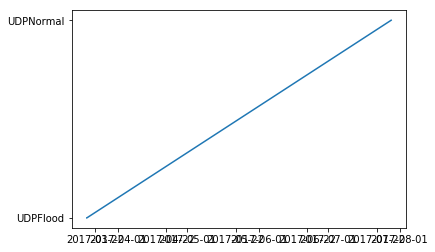

In [0]:
plt.plot(dataset["Date"].tolist(),dataset["Class"].tolist())

In [0]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [0]:
type(dataset["Class"])

pandas.core.series.Series

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset["Class"]=le.fit_transform(dataset["Class"])

In [0]:
dataset.reindex(np.random.permutation(dataset.index))
data = pd.Series(dataset["Class"].values, index=dataset["Date"].values)

In [0]:
size = int(len(data) * 0.94)
train, test = data[:size], data[size:]

In [0]:
train

2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
2017-03-18 13:11:00    0
                      ..
2017-07-28 08:16:00    1
2017-07-28 08:16:00    1
2017-07-28 08:16:00    1
2017-07-28 08:16:00    1
2017-07-28 08:16:00    1
2017-07-28 08:16:00    1
2017-07-28 08:16:00    1
2017-07-28 08:16:00    1
2017-07-28 08:16:00    1


In [0]:
history=[x for x in train]

In [0]:
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.000003, expected=1.000000
predicted=1.